In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('data_cleaned.csv')
print(data.shape)
data.head()

(337144, 9)


,comment_text,identity_hate,insult,obscene,severe_toxic,threat,toxic,positive,clean_text
0,haha you guys are a bunch of losers.,0,1,0,0,0,1,0,haha guys bunch losers
1,ur a sh*tty comment.,0,0,1,0,0,1,0,tty comment
2,It's ridiculous that these guys are being call...,0,1,0,0,0,1,0,ridiculous guys called protesters armed threat...
3,Yet call out all Muslims for the acts of a few...,1,1,0,0,0,1,0,muslims acts pilloried okay smear entire relig...
4,This bitch is nuts. Who would read a book by a...,0,1,1,0,0,1,0,bitch nuts read book woman


In [3]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(336740, 9)


In [4]:
labels= ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(sublinear_tf=True)

vects = vectorizer.fit_transform(data['clean_text'])
target = data[['positive'] + labels].values

In [7]:
print('X shape', vects.shape)
print('Y shape', target.shape)

X shape (336740, 259211)
Y shape (336740, 7)


In [8]:
from utils.ml import train_model

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
def pr(y_i, y):
    p = vects[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

Mean Score 0.9795 +- 0.0008
Mean Accuracy 0.9373 +- 0.0014


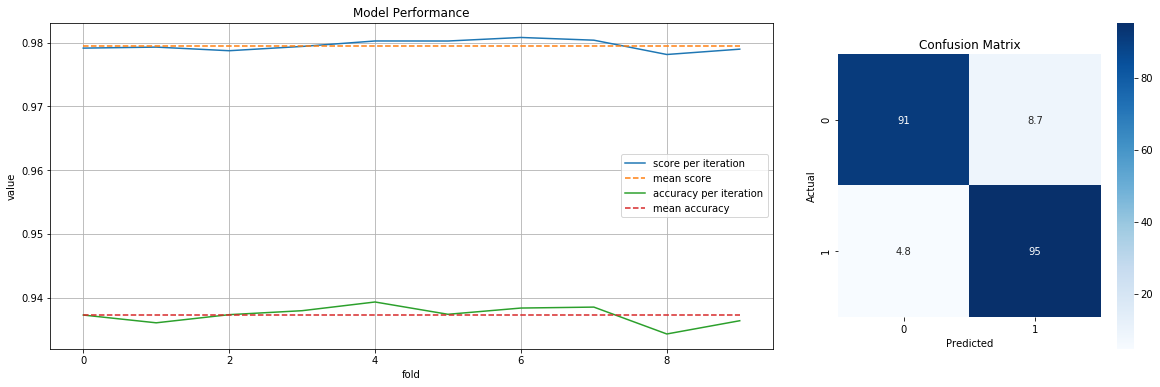

In [11]:
y = target[:, 0]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True, 
                           C=0.05)
lr0_performance, lr0_cm, lr0_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr0_performance['score']), 4), '+-', round(np.std(lr0_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr0_performance['accuracy']), 4), '+-', round(np.std(lr0_performance['accuracy']), 4))

Mean Score 0.9756 +- 0.0018
Mean Accuracy 0.9521 +- 0.0013


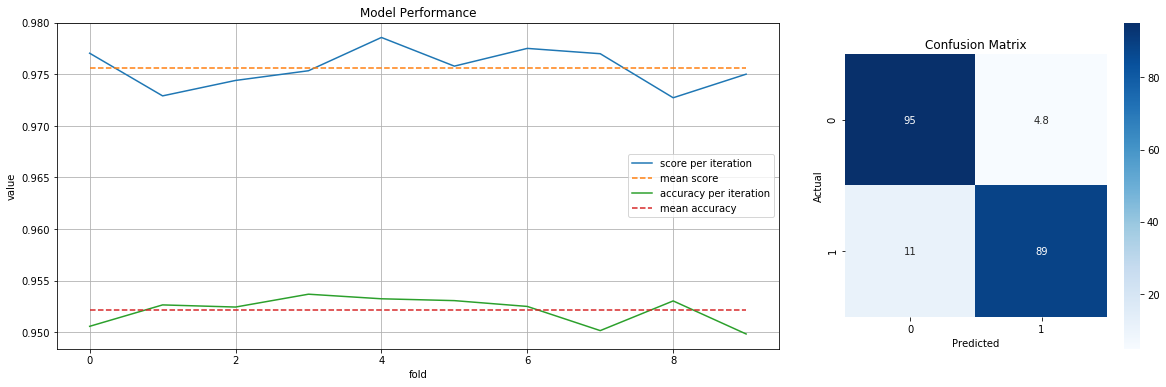

In [12]:
y = target[:, 1]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True,
                           C=0.1)
lr1_performance, lr1_cm, lr1_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr1_performance['score']), 4), '+-', round(np.std(lr1_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr1_performance['accuracy']), 4), '+-', round(np.std(lr1_performance['accuracy']), 4))

Mean Score 0.9665 +- 0.0006
Mean Accuracy 0.9105 +- 0.0011


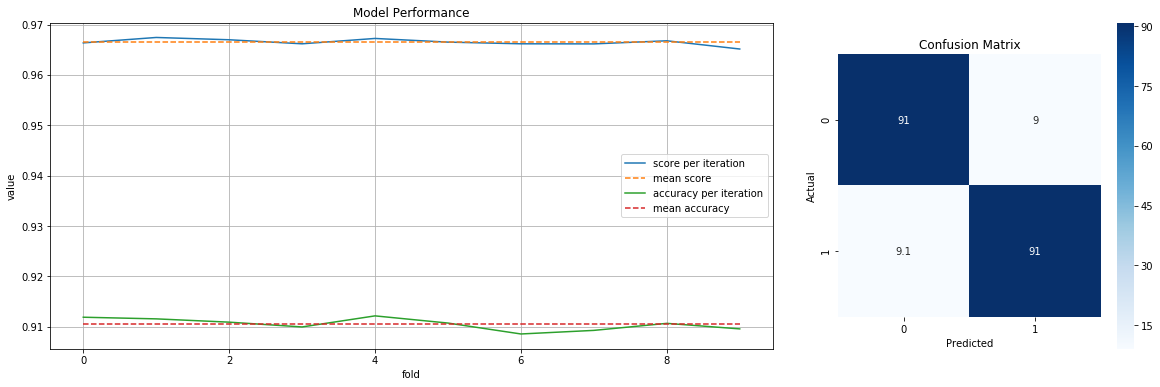

In [13]:
y = target[:, 2]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True, C=1.0)
lr2_performance, lr2_cm, lr2_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr2_performance['score']), 4), '+-', round(np.std(lr2_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr2_performance['accuracy']), 4), '+-', round(np.std(lr2_performance['accuracy']), 4))

Mean Score 0.9684 +- 0.0012
Mean Accuracy 0.9552 +- 0.0008


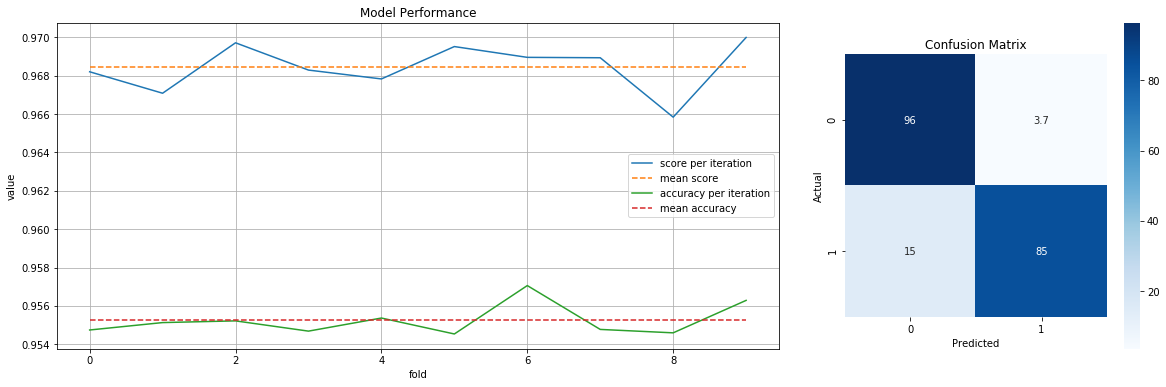

In [14]:
y = target[:, 3]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True,
                           C=1.0)
lr3_performance, lr3_cm, lr3_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr3_performance['score']), 4), '+-', round(np.std(lr3_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr3_performance['accuracy']), 4), '+-', round(np.std(lr3_performance['accuracy']), 4))

Mean Score 0.9846 +- 0.0034
Mean Accuracy 0.9828 +- 0.0004


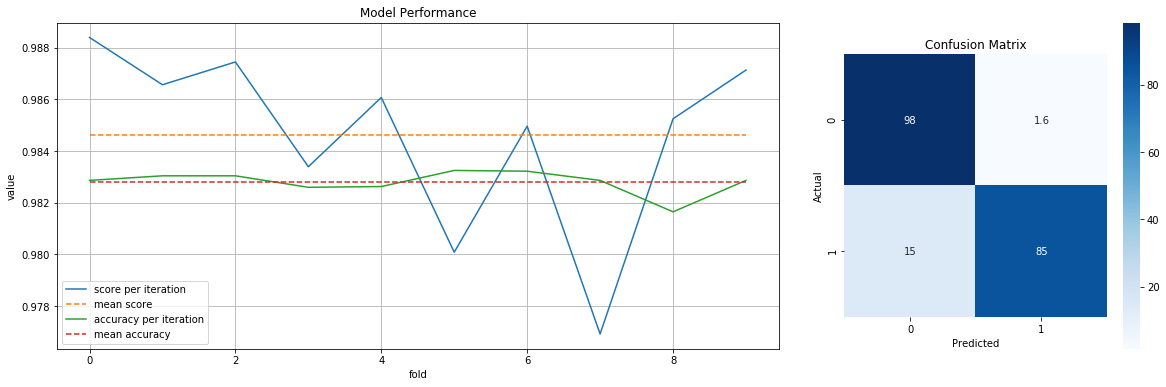

In [15]:
y = target[:, 4]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True, 
                           C=0.1)
lr4_performance, lr4_cm, lr4_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr4_performance['score']), 4), '+-', round(np.std(lr4_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr4_performance['accuracy']), 4), '+-', round(np.std(lr4_performance['accuracy']), 4))

Mean Score 0.9699 +- 0.003
Mean Accuracy 0.9685 +- 0.001


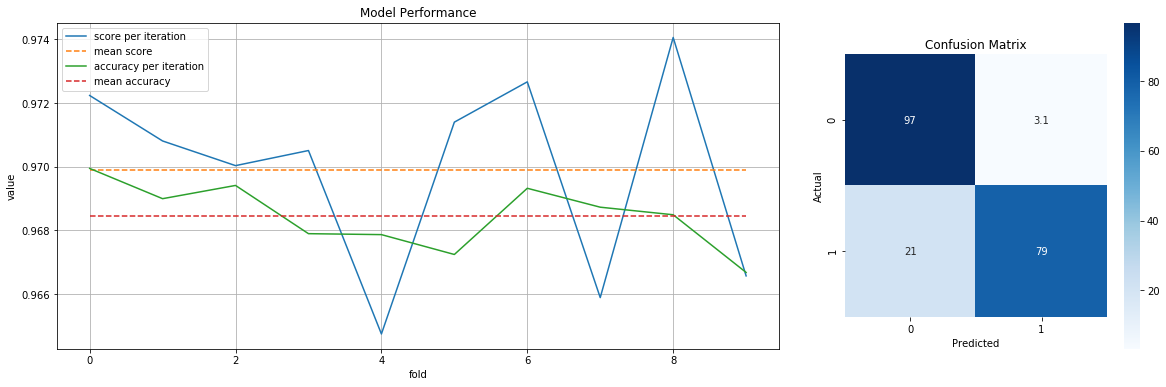

In [16]:
y = target[:, 5]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True,
                           C=0.1)
lr5_performance, lr5_cm, lr5_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr5_performance['score']), 4), '+-', round(np.std(lr5_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr5_performance['accuracy']), 4), '+-', round(np.std(lr5_performance['accuracy']), 4))

Mean Score 0.9795 +- 0.0007
Mean Accuracy 0.9385 +- 0.0012


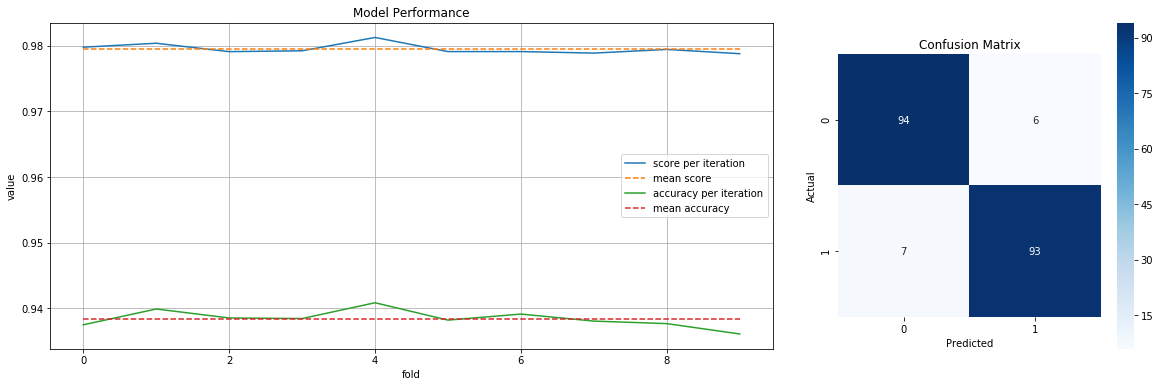

In [17]:
y = target[:, 6]
r = np.log(pr(1,y) / pr(0,y))
x = vects.multiply(r)

model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1_00_000, random_state=101, warm_start=True, C=1.0)
lr6_performance, lr6_cm, lr6_model = train_model(model, x.tocsr(), y)
print('Mean Score', round(np.mean(lr6_performance['score']), 4), '+-', round(np.std(lr6_performance['score']), 4))
print('Mean Accuracy', round(np.mean(lr6_performance['accuracy']), 4), '+-', round(np.std(lr6_performance['accuracy']), 4))

In [18]:
import pickle

In [19]:
pickle.dump([lr0_model, lr1_model, lr2_model, lr3_model, lr4_model, lr5_model, lr6_model], open('NBFeaturer.pkl', 'wb'))